In [243]:
import pandas as pd 

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix 
import seaborn as sn

In [244]:
def draw_pie (df_col , title) :
    stage = df_col.value_counts()
    name = stage.index
    value = stage.values
    fig = px.pie(df , names = name , values = value , title = title)
    fig.show()

def draw_col(col_name):
    fig , ax = plt.subplots(1,1,  figsize=(10, 5))
    sns.set(font_scale = 1.5)
    sns.countplot(x = col_name , hue = df['Survived'])
    plt.show()

In [245]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
df.shape

(891, 12)

In [247]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [248]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [250]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [251]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [252]:
df['Age'].median()

28.0

In [253]:
df['Age'].fillna(df['Age'].median() , inplace= True)
df.dropna(subset = ['Embarked'] , inplace= True)
df['Cabin'].fillna('x' , inplace= True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [254]:
draw_pie(df["Survived"] , 'Survived')

In [255]:
draw_pie(df["Pclass"], 'Passenger Class')

In [256]:
draw_pie(df["Embarked"] , 'Embarked')

In [257]:
draw_pie(df['Sex'] , 'Sex')

In [258]:
draw_pie(df['Parch'] , 'Parents|Children')

In [259]:
draw_pie(df['SibSp'] , 'Siblings|Spouses')

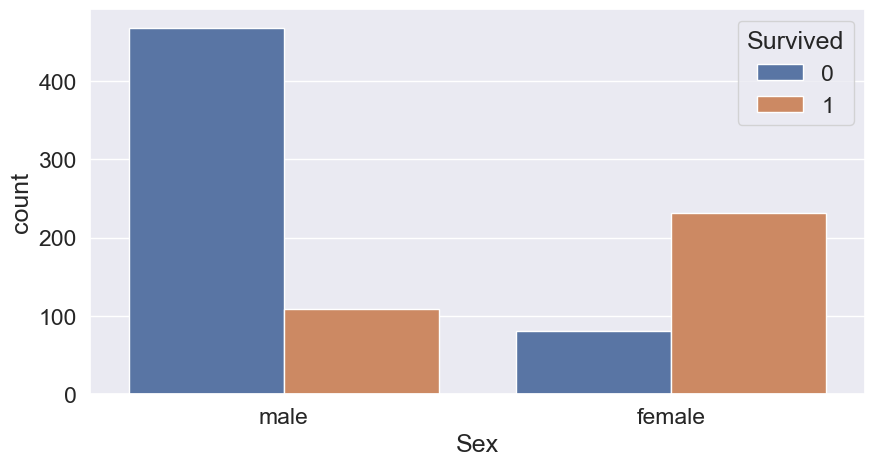

In [260]:
draw_col(df['Sex'])

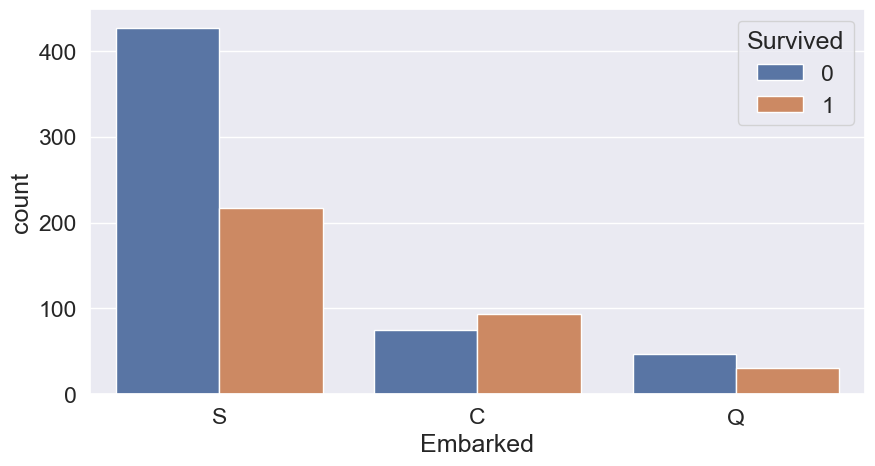

In [261]:
draw_col(df['Embarked'])

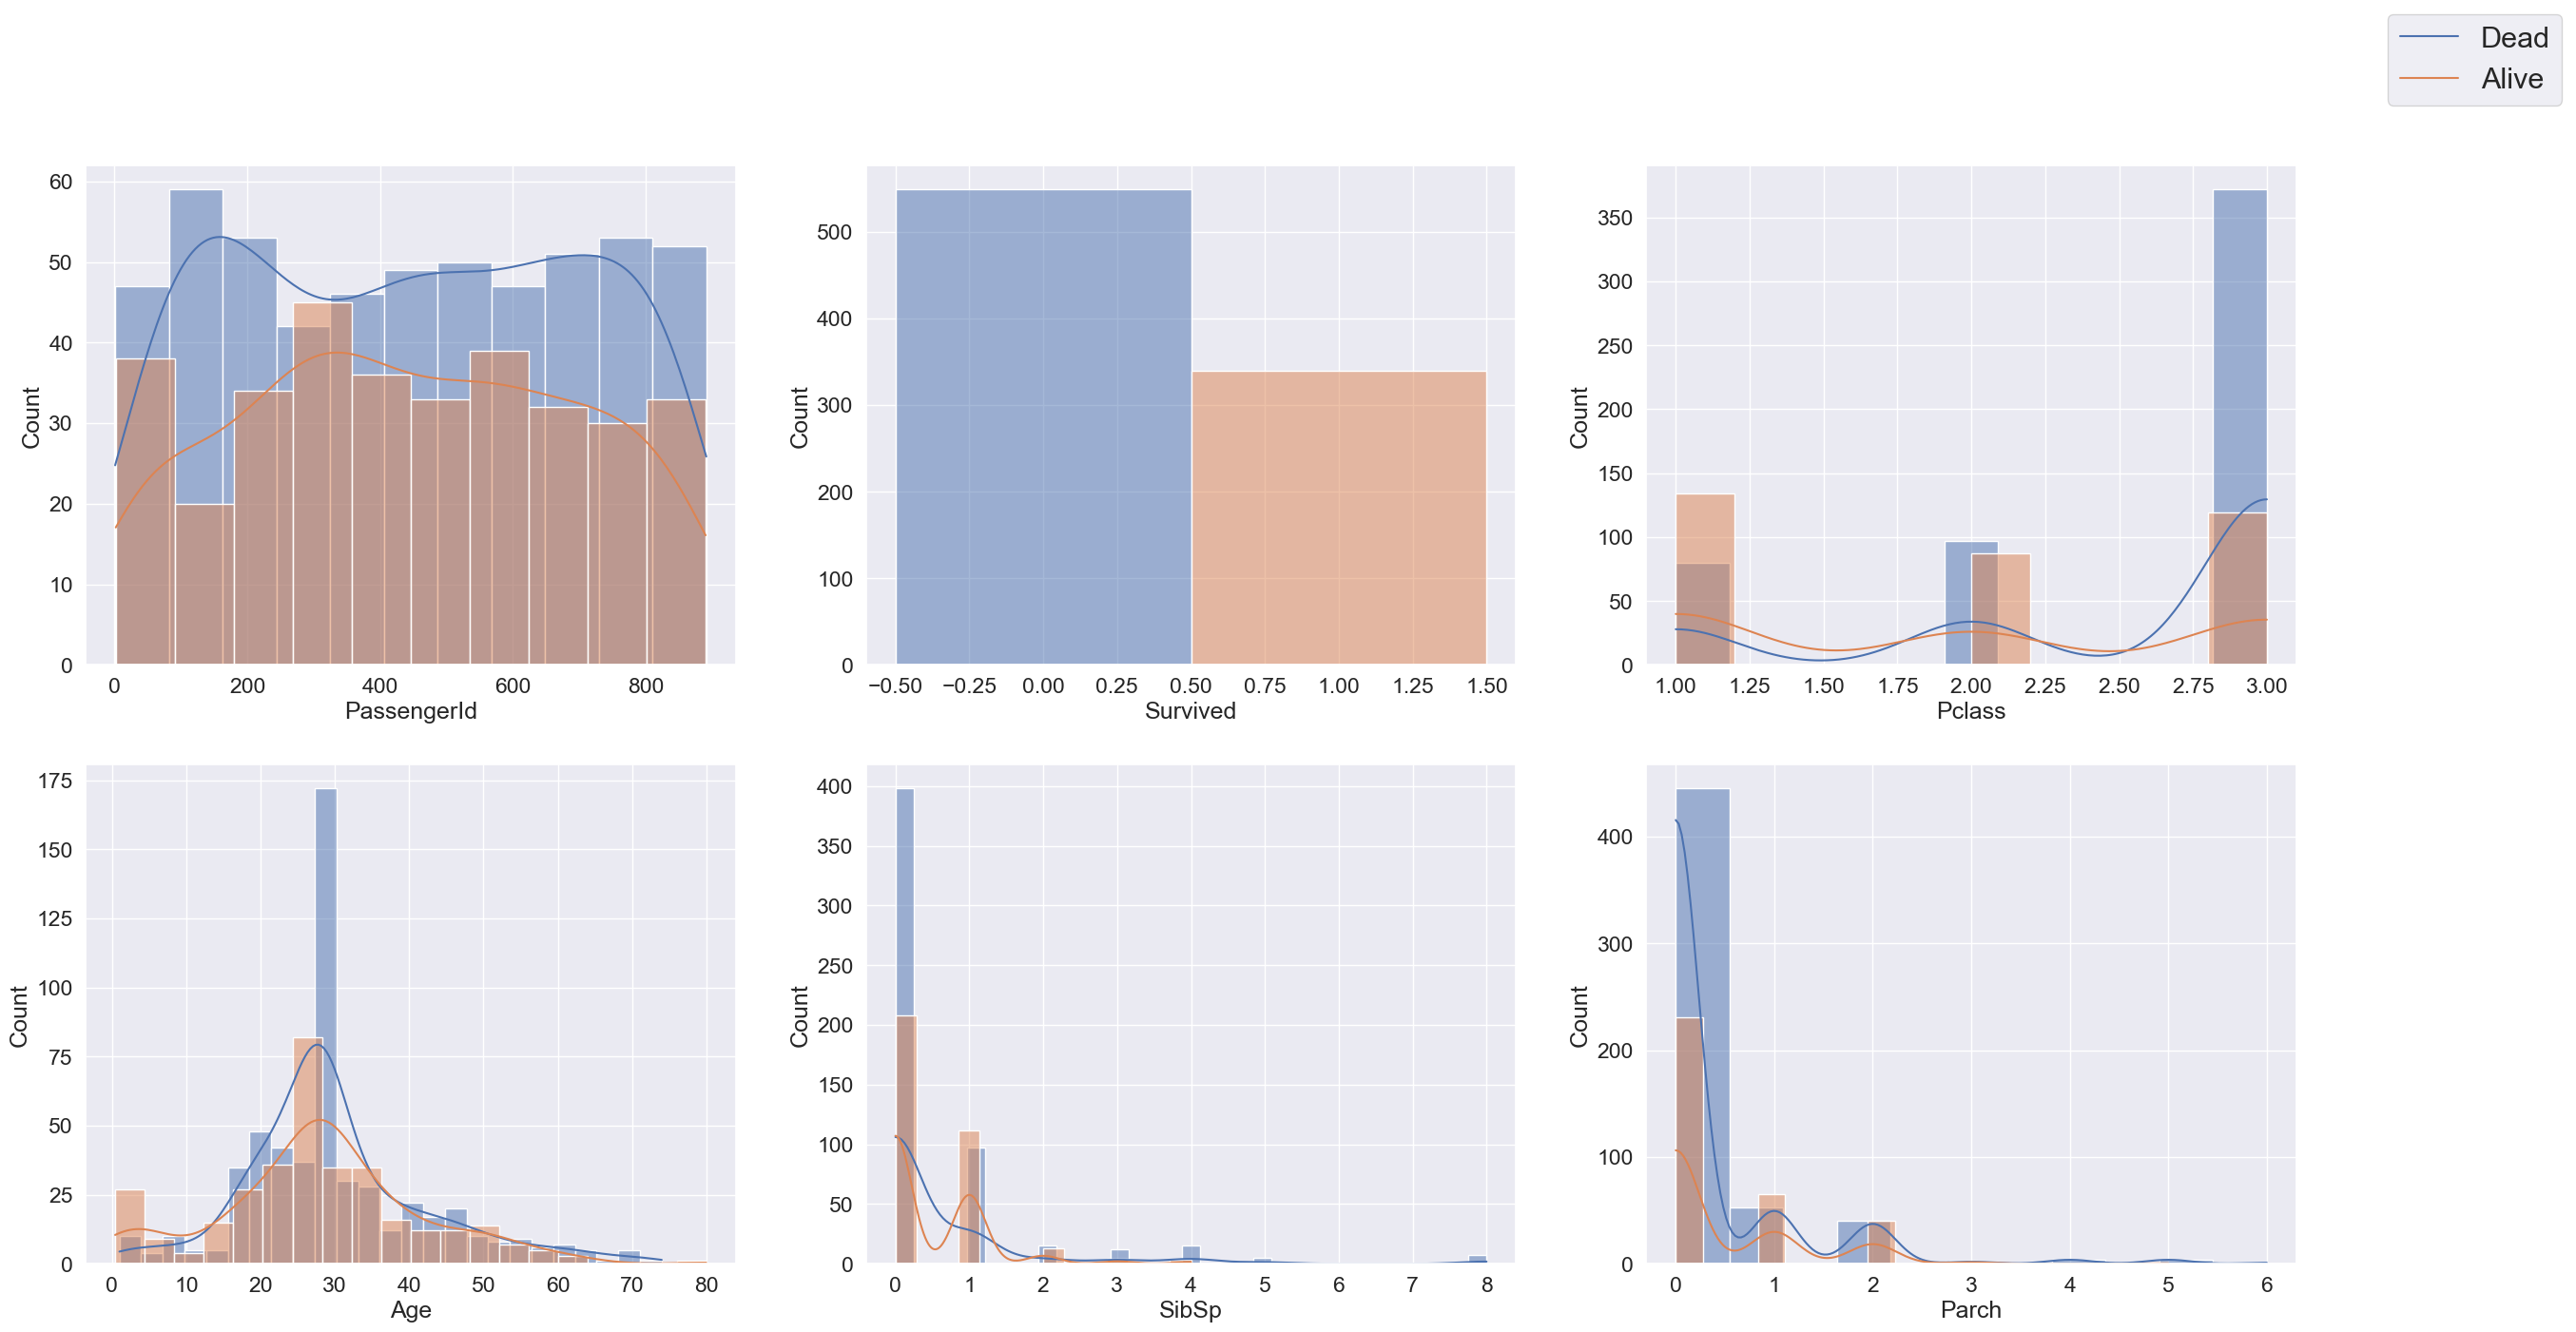

In [262]:
Alive_df = df[df['Survived'] == 0]
Dead_df = df[df['Survived'] == 1]

sns.set(font_scale=1.5)
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
i = 0

for col in df.select_dtypes(include=['float64', 'int64']):
    sns.histplot(Alive_df[col], label=0, ax=ax[i // 3][i % 3], kde=True)
    sns.histplot(Dead_df[col], label=1, ax=ax[i // 3][i % 3], kde=True)
    i += 1

    if i == 6:
        break

fig.legend(labels=['Dead', 'Alive'], fontsize='22')
plt.show()

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [264]:
X = df.drop(['PassengerId' , 'Survived' , 'Name' , 'Ticket' , 'Fare', 'Cabin'], axis= 1)
y = df['Survived']

In [265]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    object 
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Embarked  889 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 48.6+ KB


In [266]:
X['Sex'].replace({"male" : 0 , 'female' : 1} , inplace= True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 48.6+ KB


In [267]:
X = pd.get_dummies(X, columns=['Embarked'], prefix='Embarked', drop_first=True)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,False,True
1,1,1,38.0,1,0,False,False
2,3,1,26.0,0,0,False,True
3,1,1,35.0,1,0,False,True
4,3,0,35.0,0,0,False,True


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [279]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.74      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



In [280]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR))


              precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.77      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [281]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.83      0.70      0.76        69

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



Text(86.25, 0.5, 'Truth')

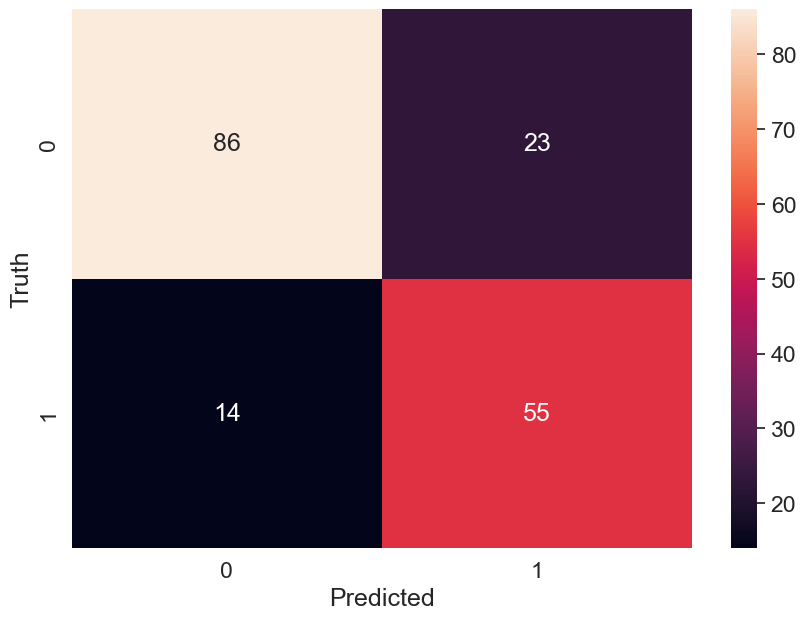

In [293]:
y_predicted = svc.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')